### Diamond Pricing - Project Code

Python for Data Science - Aatreyi Dutt, 24070243059

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

##### Data PreProcessing

In [2]:
# source:
# https://www.kaggle.com/datasets/shivam2503/diamonds

Fetch data

In [3]:
data = pd.read_csv("diamonds.csv")	#fetch data
data.head()	# see first 5 rows

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Initial data size

In [4]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Initial Data Statistics

In [5]:
data.describe()	# data statistics

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Minimum values for dimensions x, y, and z are 0 - which should not be possible.
Let's remove this erroneous data:

In [6]:
data = data[(data != 0).all(axis=1)]

Data Statistics after cleanup

In [7]:
data.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Data size after cleanup

In [8]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


So, 20 erroneous rows were removed

##### Managing 'cut' column

Types of diamond cuts

In [9]:
data.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

Manual Label Encoding of $cut$ attribute

In [10]:
data.cut = data.cut.replace(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], [5,4,3,2,1])
#							  best				 					   worst

C:\Users\HOME\AppData\Local\Temp\ipykernel_14528\2583480138.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.cut = data.cut.replace(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], [5,4,3,2,1])
C:\Users\HOME\AppData\Local\Temp\ipykernel_14528\2583480138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.cut = data.cut.replace(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], [5,4,3,2,1])


##### Managing 'color' column

Types of diamond colours

In [11]:
data.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

Manual Label Encoding of $color$ column

In [12]:
data.color = data.color.replace(['D','E','F','G','H','I','J'],[7,6,5,4,3,2,1])
# 								 best					worst

C:\Users\HOME\AppData\Local\Temp\ipykernel_14528\1662496101.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.color = data.color.replace(['D','E','F','G','H','I','J'],[7,6,5,4,3,2,1])
C:\Users\HOME\AppData\Local\Temp\ipykernel_14528\1662496101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.color = data.color.replace(['D','E','F','G','H','I','J'],[7,6,5,4,3,2,1])


##### Managing 'clarity' column

Diamond clarity distinctions

In [13]:
data.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

Manual Label Encoding of $clarity$ column

In [14]:
data.clarity = data.clarity.replace(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],[1,2,3,4,5,6,7,8])
# 									worst											   best

C:\Users\HOME\AppData\Local\Temp\ipykernel_14528\1265755468.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.clarity = data.clarity.replace(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],[1,2,3,4,5,6,7,8])
C:\Users\HOME\AppData\Local\Temp\ipykernel_14528\1265755468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.clarity = data.clarity.replace(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],[1,2,3,4,5,6,7,8])


Data after PreProcessing

In [15]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


##### Data Statistics

$carat$ column

In [16]:
data.carat.describe()

count    53920.000000
mean         0.797698
std          0.473795
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

$cut$ column

In [17]:
data.cut.describe()

count    53920.000000
mean         3.904228
std          1.116579
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: cut, dtype: float64

$clarity$ column

In [18]:
data.clarity.describe()

count    53920.000000
mean         4.051502
std          1.647005
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          8.000000
Name: clarity, dtype: float64

$color$ column

In [19]:
data.color.describe()

count    53920.000000
mean         4.405972
std          1.701272
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max          7.000000
Name: color, dtype: float64

$price$ column

In [20]:
data.price.describe()

count    53920.000000
mean      3930.993231
std       3987.280446
min        326.000000
25%        949.000000
50%       2401.000000
75%       5323.250000
max      18823.000000
Name: price, dtype: float64

##### Data Distribution

Price distribution

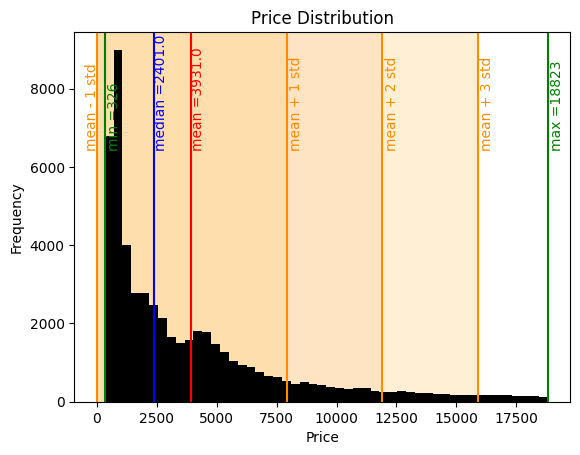

In [21]:
plt.title("Price Distribution")
plt.xlabel('Price')
plt.ylabel('Frequency')

mean = data.price.mean()
std = data.price.std()

plt.axvline(mean, color="red")
plt.axvline(data.price.median(), color="blue")
plt.axvline(data.price.min(), color="green")
plt.axvline(data.price.max(), color="green")
plt.axvline(0, color="darkorange")
plt.axvline(mean+std, color="darkorange")
plt.axvspan(0, mean+std, fc = "navajowhite")
plt.axvline(mean+(2*std), color="darkorange")
plt.axvspan(mean+std, data.price.mean()+(2*std), fc = "bisque")
plt.axvline(mean+(3*std), color="darkorange")
plt.axvspan(mean+(2*std), data.price.mean()+(3*std), fc = "papayawhip")


plt.text(mean, 6500, "mean =" + str(round(mean,1)), color = "red", rotation=90)
plt.text(data.price.median(), 6500, "median =" + str(data.price.median()), color = "blue", rotation=90)
plt.text(data.price.min()+100, 6500, "min =" + str(data.price.min()), color = "green", rotation=90)
plt.text(data.price.max()+100, 6500, "max =" + str(data.price.max()), color = "green", rotation=90)
plt.text(mean+std+100, 6500, "mean + 1 std", color = "darkorange", rotation=90)
plt.text(-500, 6500, "mean - 1 std", color = "darkorange", rotation=90)
plt.text(mean+(2*std)+100, 6500, "mean + 2 std", color = "darkorange", rotation=90)
plt.text(mean+(3*std)+100, 6500, "mean + 3 std", color = "darkorange", rotation=90)

plt.hist(data.price, bins = 50, color="black")
# plt.grid()
plt.show()

Carat distribution

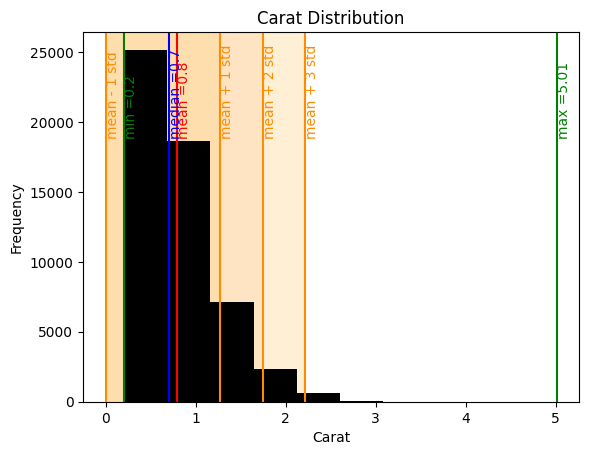

In [22]:
mean = data.carat.mean()
std = data.carat.std()

plt.axvline(mean, color="red")
plt.axvline(data.carat.median(), color="blue")
plt.axvline(data.carat.min(), color="green")
plt.axvline(data.carat.max(), color="green")
plt.axvline(0, color="darkorange")
plt.axvline(mean+std, color="darkorange")
plt.axvspan(0, mean+std, fc = "navajowhite")
plt.axvline(mean+(2*std), color="darkorange")
plt.axvspan(mean+std, mean+(2*std), fc = "bisque")
plt.axvline(mean+(3*std), color="darkorange")
plt.axvspan(mean+(2*std), mean+(3*std), fc = "papayawhip")


plt.text(mean, 19000, "mean ="+str(round(mean,1)), color = "red", rotation=90)
plt.text(data.carat.median(), 19000, "median ="+str(data.carat.median()), color = "blue", rotation=90)
plt.text(data.carat.min(), 19000, "min =" + str(data.carat.min()), color = "green", rotation=90)
plt.text(data.carat.max(), 19000, "max =" + str(data.carat.max()), color = "green", rotation=90)
plt.text(mean+std, 19000, "mean + 1 std", color = "darkorange", rotation=90)
plt.text(0, 19000, "mean - 1 std", color = "darkorange", rotation=90)
plt.text(mean+(2*std), 19000, "mean + 2 std", color = "darkorange", rotation=90)
plt.text(mean+(3*std), 19000, "mean + 3 std", color = "darkorange", rotation=90)

plt.hist(data.carat, bins = 10, color='black')
plt.title("Carat Distribution")
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.show()

Cut distribution

C:\Users\HOME\AppData\Local\Temp\ipykernel_14528\2614182684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.cut = data.cut.replace([5,4,3,2,1],['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'])


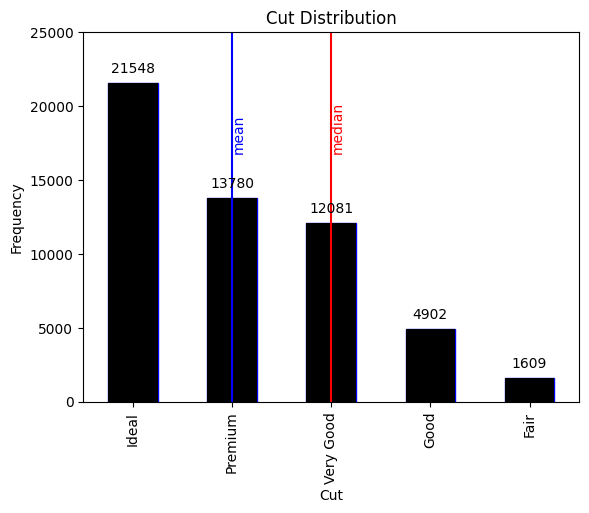

In [23]:
# categorical for hist.
data.cut = data.cut.replace([5,4,3,2,1],['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'])

counts = data['cut'].value_counts()
counts.plot(kind='bar', color='k', edgecolor='blue', rot=90)

for index, value in enumerate(counts):
    plt.text(index, value + 500, str(value), ha='center', va='bottom', color='k')	# label
counts.plot(kind='bar', color='k')

plt.axvline(1,color='b')
plt.text(1,17000,"mean",color='b', rotation=90)
plt.axvline(2,color='r')
plt.text(2,17000,"median", color='r',rotation=90)

plt.title("Cut Distribution")
plt.xlabel('Cut')
plt.ylabel('Frequency')
plt.ylim(0,25000)
plt.show()

In [24]:
data['cut'].value_counts()

cut
Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: count, dtype: int64

Colour distribution

In [25]:
colors = data['color'].unique()
print(colors)

[6 2 1 3 5 4 7]


C:\Users\HOME\AppData\Local\Temp\ipykernel_14528\1481363134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.color = data.color.replace([7,6,5,4,3,2,1],['D','E','F','G','H','I','J'])


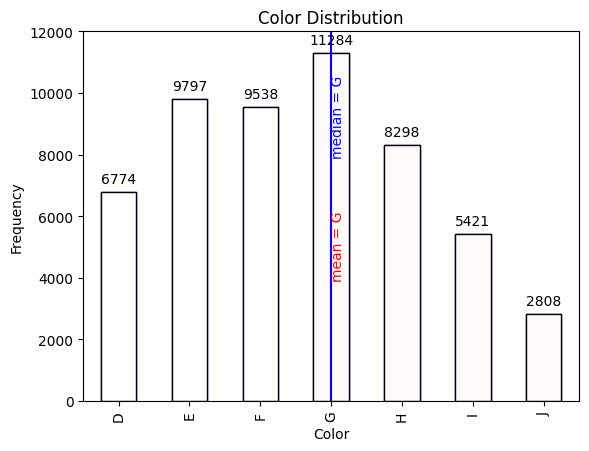

In [ ]:
data.color = data.color.replace([7,6,5,4,3,2,1],['D','E','F','G','H','I','J'])

plt.axvline(3, color="red")
plt.axvline(3, color="blue")

plt.text(3,4000, "mean = G", color = "red", rotation=90)
plt.text(3,8000, "median = G", color = "blue", rotation=90)

counts = data['color'].value_counts()
custom_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
counts = counts.reindex(custom_order)
counts.plot(kind='bar', color='k', edgecolor='blue')

for index, value in enumerate(counts):
    plt.text(index, value + 200, str(value), ha='center', va='bottom')	# label
counts.plot(kind='bar', color=['white','white','white', 'snow','snow','snow','snow'], ec='k')

plt.title("Color Distribution")
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.ylim(0,12000)
plt.show()

Clarity distribution

C:\Users\HOME\AppData\Local\Temp\ipykernel_14528\1500732875.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.clarity = data.clarity.replace([1,2,3,4,5,6,7,8],['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])


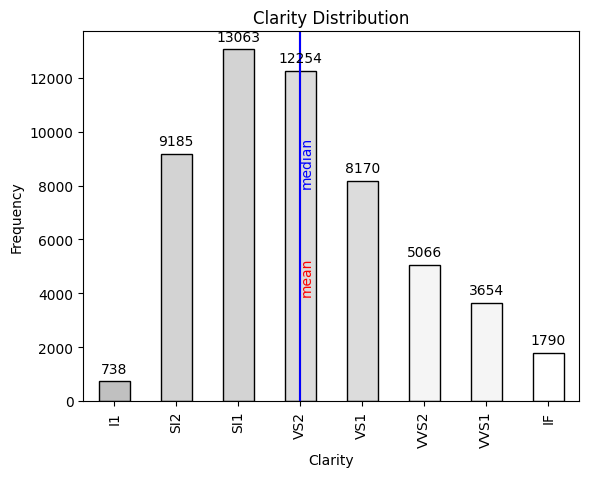

In [34]:
plt.axvline(3, color="red")
plt.axvline(3, color="blue")

plt.text(3, 4000, "mean", color = "red", rotation=90)
plt.text(3, 8000, "median", color = "blue", rotation=90)

data.clarity = data.clarity.replace([1,2,3,4,5,6,7,8],['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])

counts = data['clarity'].value_counts()
custom_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
counts = counts.reindex(custom_order)
counts.plot(kind='bar', color=['silver','lightgrey','lightgrey','gainsboro','gainsboro','whitesmoke','whitesmoke','white'],ec='k')

for index, value in enumerate(counts):
    plt.text(index, value + 200, str(value), ha='center', va='bottom')	# label
plt.title("Clarity Distribution")
plt.xlabel('Clarity')
plt.ylabel('Frequency')
plt.show()

##### Correlations

Correlation heatmap

C:\Users\HOME\AppData\Local\Temp\ipykernel_14528\1732951094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.cut = data.cut.replace(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], [5,4,3,2,1])
C:\Users\HOME\AppData\Local\Temp\ipykernel_14528\1732951094.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.color = data.color.replace(['D','E','F','G','H','I','J'],[7,6,5,4,3,2,1])
C:\Users\HOME\AppData\Local\Temp\ipykernel_14528\1732951094.py:4: SettingWithCopyWarning: 
A value is trying to be se

<Axes: >

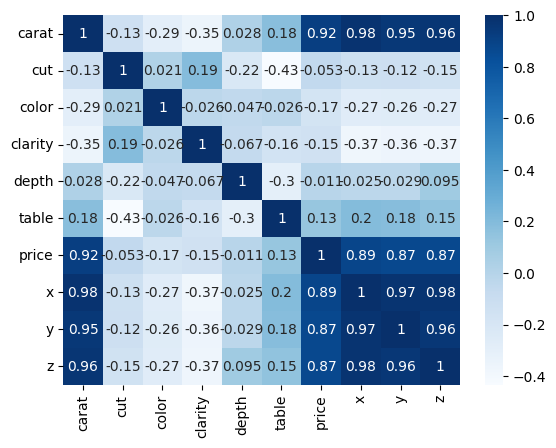

In [37]:
# label encoding
data.cut = data.cut.replace(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], [5,4,3,2,1])
data.color = data.color.replace(['D','E','F','G','H','I','J'],[7,6,5,4,3,2,1])
data.clarity = data.clarity.replace(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],[1,2,3,4,5,6,7,8])

corr = data.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

x,y,z dimensions vs carat

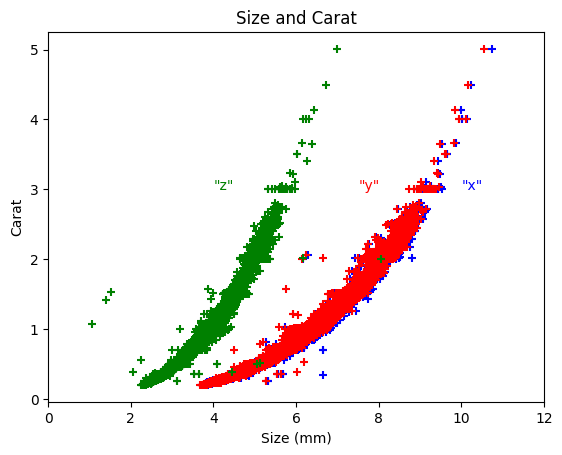

In [ ]:
c = data.carat
x = data.x
y = data.y
z = data.z

plt.scatter(x,c, marker='+', color='b')
plt.scatter(y,c, marker='+', color='r')
plt.scatter(z,c, marker='+', color='g')

plt.title("Size and Carat")
plt.xlabel('Size (mm)')
plt.ylabel('Carat')

plt.xlim(0,12)
plt.text(10,3,"\"x\"", color='b')
plt.text(7.5,3,"\"y\"", color='r')
plt.text(4,3,"\"z\"", color='g')
plt.show()

Carat vs Price

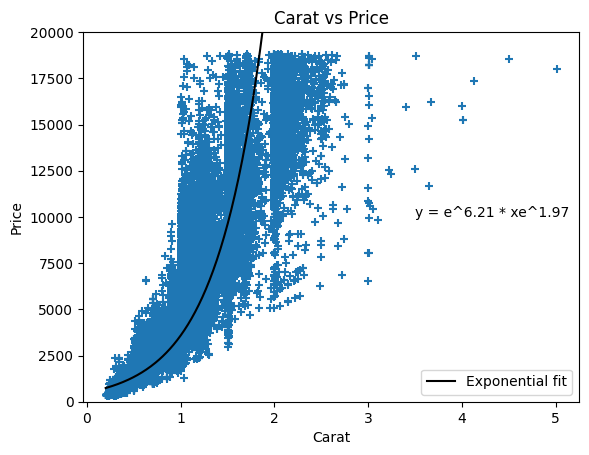

In [ ]:
x = data.carat
y = data.price
plt.scatter(x, y, marker='+')	# scatter

log_y = np.log(y)	# taking log of dependent var

p = np.polyfit(x, log_y, 1)	# fit curve
x_fine = np.linspace(min(x), max(x), 500)	# making range
y_fit = np.exp(p[1]) * np.exp(p[0] * x_fine)	# equation of line

plt.plot(x_fine, y_fit, color="black", label="Exponential fit")
plt.text(3.5,10000, "y = e^"+str(round(p[1],2))+" * xe^"+str(round(p[0],2)))

plt.ylim(0, 20000)
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Carat vs Price')
plt.legend()
plt.show()

In [31]:
# to build the exponential fit equation
print(p[1],p[0])

6.214495115487399 1.9705416455904345
